
# TP10 - Unsupervised Learning

(https://hastie.su.domains/ISLP/ISLP_website.pdf - Chp12)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We also collect the new imports
needed for this lab.

In [2]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)

## Principal Components Analysis
In this lab, we perform PCA on  `USArrests`, a data set in the
`R` computing environment.
We retrieve the data using `get_rdataset()`, which can fetch data from
many standard `R` packages.

The rows of the data set contain the 50 states, in alphabetical order.

In [4]:
USArrests = get_rdataset('USArrests').data
USArrests


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


The columns of the data set contain the four variables.

In [5]:
USArrests.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

We first briefly examine the data. We notice that the variables have vastly different means.

In [6]:
USArrests.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Dataframes have several useful methods for computing
column-wise summaries. We can also examine the
variance of the four variables using the `var()`  method.

In [6]:
USArrests.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

- Not surprisingly, the variables also have vastly different variances:
  - The `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per 100,000 individuals.

- PCA looks for derived variables that account for most of the variance in the data set.

- If we do not scale the variables before performing PCA, then the principal components would mostly be driven by the `Assault` variable, since it has by far the largest variance.  

- So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA. Typically we set the means to zero as well.

- This scaling can be done via the `StandardScaler()` transform imported above. We first `fit` the scaler, which computes the necessary means and standard deviations and then apply it to our data using the `transform` method. We combine these steps using the `fit_transform()` method.
(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [7]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)


Having scaled the data, we can then
perform principal components analysis using the `PCA()` transform
from the `sklearn.decomposition` package.

In [11]:
pcaUS = PCA()

(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [12]:
pcaUS.fit(USArrests_scaled)


PCA()

After fitting, the `mean_` attribute corresponds to the means
of the variables. In this case, since we centered and scaled the data with
`scaler()` the means will all be 0.

In [13]:
pcaUS.mean_


array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

The scores can be computed using the `transform()` method
of `pcaUS` after it has been fit.

In [14]:
scores = pcaUS.transform(USArrests_scaled)


We will plot these scores a bit further down.
The `components_` attribute provides the principal component loadings:
each row of `pcaUS.components_` contains the corresponding
principal component loading vector.


In [15]:
pcaUS.components_ 


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

The `biplot`  is a common visualization method used with PCA. It is not built in as a standard part of `sklearn`, though there are python packages that do produce such plots. Here we make a simple biplot manually.

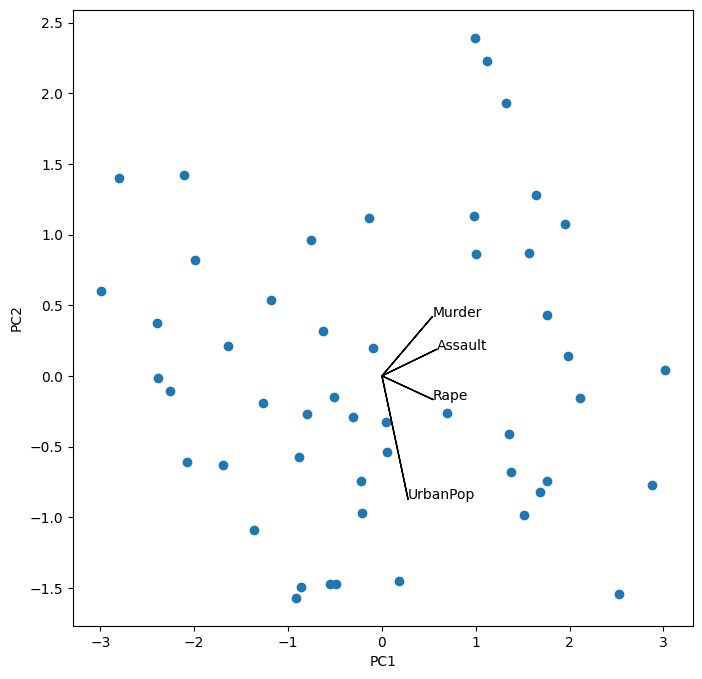

In [16]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])


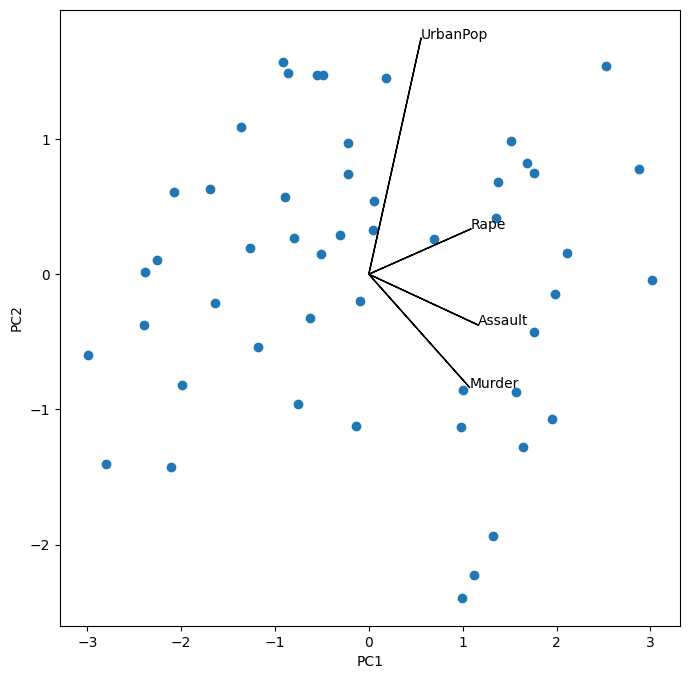

In [17]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])


This figure is known as a biplot, because it displays both the principal component scores and the principal component loadings.

The blue dots represent the scores for the first two principal components. 

The black arrows indicate the first two principal component loading vectors. 


The standard deviations of the principal component scores are as follows:

In [18]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance of each score can be extracted directly from the `pcaUS` object via
the `explained_variance_` attribute.

In [19]:
pcaUS.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

The proportion of variance explained by each principal 
component (PVE) is stored as `explained_variance_ratio_`:

In [20]:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the
variance in the data, the next principal component explains 24.7%
of the variance, and so forth.
We can plot the PVE explained by each component, as well as the cumulative PVE. We first
plot the proportion of variance explained.

In [21]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


Notice the use of `%%capture`, which suppresses the displaying of the partially completed figure.

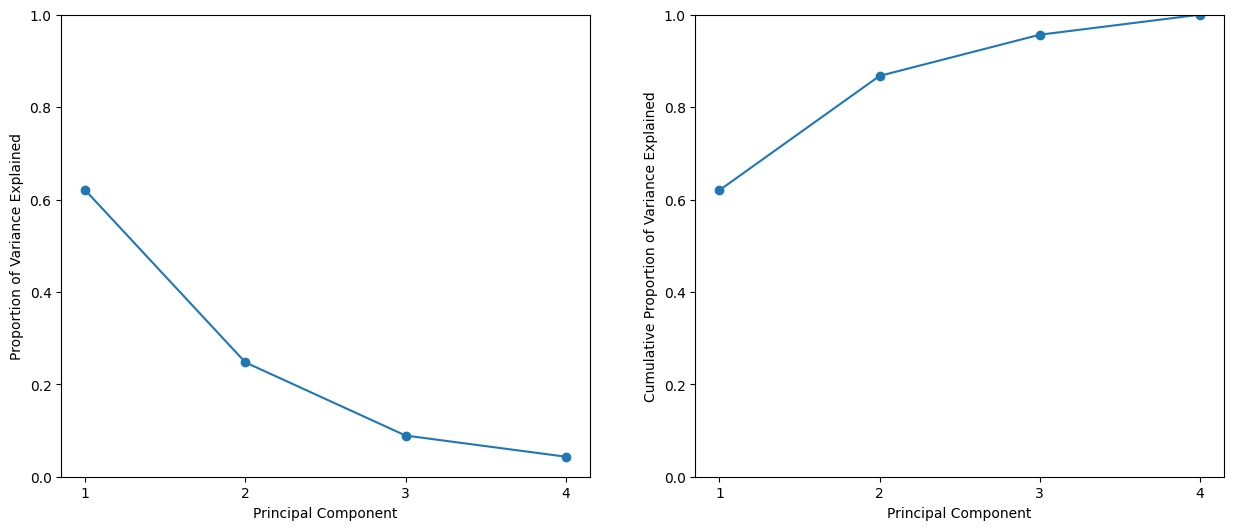

In [22]:
ax = axes[1]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig


The result is similar to that shown in Figure 12.3.  Note
that the method `cumsum()`   computes the cumulative sum of
the elements of a numeric vector. For instance:

In [23]:
a = np.array([1,2,8,-3])
np.cumsum(a)


array([ 1,  3, 11,  8])

## Matrix Completion

We now re-create the analysis carried out on the `USArrests` data in
Section 12.3.

We saw  in Section 12.2.2  that solving the optimization
problem (12.6)   on a centered data matrix $\bf X$ is
equivalent to computing the first $M$ principal
components of the data.  We use our scaled
and centered `USArrests` data as $\bf X$ below. The *singular value decomposition* 
(SVD)  is a general algorithm for solving
(12.6). 

In [24]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape


((50, 4), (4,), (4, 4))

The `np.linalg.svd()` function returns three components, `U`, `D` and `V`. The matrix `V` is equivalent to the
loading matrix from principal components (up to an unimportant sign flip). Using the `full_matrices=False` option ensures that
for a tall matrix the shape of `U` is the same as the shape of `X`.

In [25]:
V


array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [26]:
pcaUS.components_


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

The matrix `U` corresponds to a  *standardized* version of the PCA score matrix (each column standardized to have sum-of-squares one). If we multiply each column of `U` by the corresponding element  of `D`, we recover the PCA scores exactly (up to a meaningless sign flip).

In [27]:
(U * D[None,:])[:3]


array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [25]:
scores[:3]


array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

While it would be possible to carry out this lab using the `PCA()` estimator,
here we use the `np.linalg.svd()` function in order to illustrate its use.

We now omit 20 entries in the $50\times 4$ data matrix at random. We do so
by first selecting 20 rows (states) at random, and then selecting one
of the four entries in each row at random. This ensures that every row has
at least three observed values.

In [28]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan


Here the array `r_idx`
contains 20 integers from 0 to 49; this represents the states (rows of `X`) that are selected to contain missing values. And `c_idx` contains
20 integers from 0 to 3, representing the features (columns in `X`) that contain the missing values for each of the selected states.

We now write some code to implement Algorithm 12.1. 
We first write a  function that takes in a matrix, and returns an approximation to the matrix using the `svd()` function.
This will be needed in Step 2 of Algorithm 12.1.

In [29]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])


To conduct Step 1 of the algorithm, we initialize `Xhat` --- this is $\tilde{\bf X}$ in Algorithm 12.1 ---  by replacing
the missing values with the column means of the non-missing entries. These are stored in
`Xbar` below after running `np.nanmean()` over the row axis.
We make a copy so that when we assign values to `Xhat` below we do not also overwrite the
values in `Xna`.

In [30]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]


Before we begin Step 2, we set ourselves up to measure the progress of our
iterations:

In [31]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)


Here  `ismiss` is a logical matrix with the same dimensions as `Xna`;
a given element is `True` if the corresponding matrix element is missing. The notation `~ismiss` negates this boolean vector. This is useful
because it allows us to access both the missing and non-missing entries. We store the mean of the squared non-missing elements in `mss0`.
We store the mean squared error  of the non-missing elements  of the old version of `Xhat` in `mssold` (which currently
agrees with `mss0`). We plan to store the mean squared error of the non-missing elements of the current version of `Xhat` in `mss`, and will then
iterate Step 2 of  Algorithm 12.1  until the *relative error*, defined as
`(mssold - mss) / mss0`, falls below `thresh = 1e-7`.
 {Algorithm 12.1 tells us to iterate Step 2 until (12.14) is no longer decreasing. Determining whether (12.14)  is decreasing requires us only to keep track of `mssold - mss`. However, in practice, we keep track of `(mssold - mss) / mss0` instead: this makes it so that the number of iterations required for Algorithm 12.1 to converge does not depend on whether we multiplied the raw data $\bf X$ by a constant factor.}

In Step 2(a) of Algorithm 12.1, we  approximate `Xhat` using `low_rank()`; we call this `Xapp`. In Step 2(b), we  use `Xapp`  to update the estimates for elements in `Xhat` that are missing in `Xna`. Finally, in Step 2(c), we compute the relative error. These three steps are contained in the following `while` loop:

In [30]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))


Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


We see that after eight iterations, the relative error has fallen below `thresh = 1e-7`, and so the algorithm terminates. When this happens, the mean squared error of the non-missing elements equals 0.381.

Finally, we compute the correlation between the 20 imputed values
and the actual values:

In [31]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]


0.7113567434297362

In this lab, we implemented  Algorithm 12.1  ourselves for didactic purposes. However, a reader who wishes to apply matrix completion to their data might look to more specialized `Python`  implementations.

## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [32]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;


We now perform $K$-means clustering with $K=2$.

In [33]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)


We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [34]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

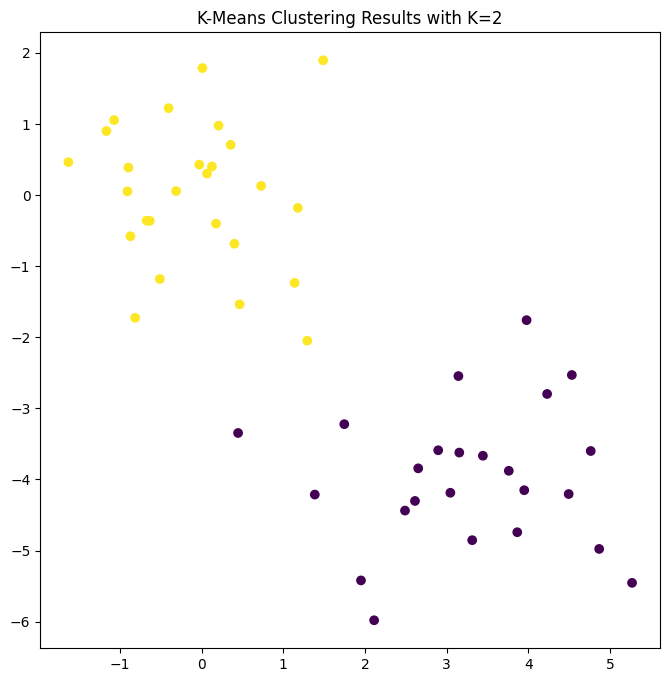

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");


Here the observations can be easily plotted because they are
two-dimensional. If there were more than two variables then we could
instead perform PCA and plot the first two principal component score
vectors to represent the clusters.

In this example,   we knew that there really
were two clusters because we generated the data. However, for real
data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could
instead have performed $K$-means clustering on this example with
$K=3$.

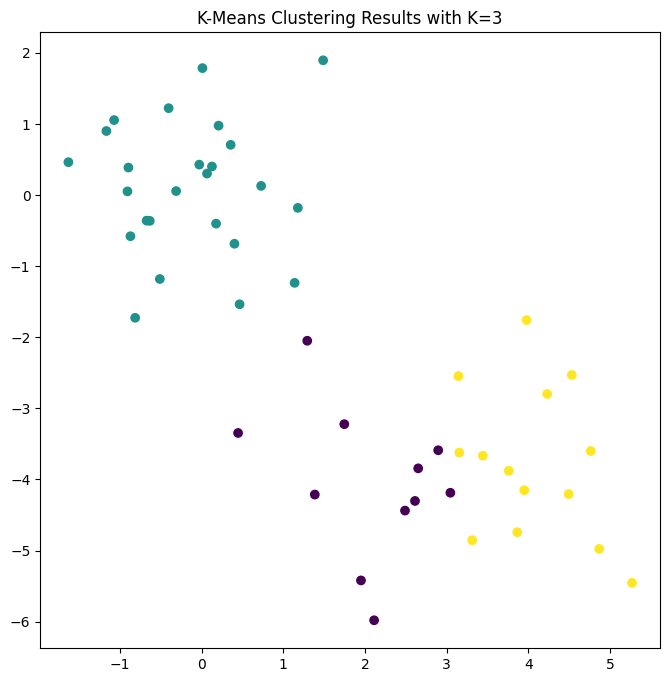

In [36]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");


When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10). If a
value of `n_init` greater than one is used, then $K$-means
clustering will be performed using multiple random assignments in
Step 1 of  Algorithm 12.2, and the `KMeans()` 
function will report only the best results. Here we compare using
`n_init=1` to `n_init=20`.

In [37]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_


(76.85131986999252, 75.06261242745384)

Note that `kmeans.inertia_` is the total within-cluster sum
of squares, which we seek to minimize by performing $K$-means
clustering (12.17). 

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple
initial cluster assignments, it is also important to set a random seed
using the `random_state` argument to `KMeans()`. This way, the initial
cluster assignments in Step 1 can be replicated, and the $K$-means
output will be fully reproducible.